# Graph Visualization

Week 2 Part 1 Assignment *Team 2: Raghu and Dilip

# Abstract


The goals of this assignment are

i)   Load a graph database of your choosing from a text file or other source.

ii)  Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing.

iii) Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.

iv)  Please record a short video (~ 5 minutes), and submit a link to the video in advance of our meet-up.

# Data Source


We are using the dataset from https://snap.stanford.edu/data/ related to "Social circles: Facebook".
The file name is "facebook_combined.txt.gz" and the file description is "Edges from all egonets combined".
 

# Software 


We will be using Ananconda and Jupyter notebook for documentation and networkx libraries. Gephi graph database is used for visualization.

In [63]:
from py2neo import Graph, Path, Node
#from neo4j.v1 import GraphDatabase
#graph = Graph("bolt://localhost:11002", auth=("neo4j", "password"))


In [64]:
# Importing packages
import networkx as nx
from networkx.algorithms import bipartite
import pandas as pd
import numpy as np

# Importing packages used to display images
import urllib3
from PIL import Image
import requests
from io import BytesIO

In [89]:
#Read data from file
#fbd = pd.read_table("C:\\cuny\\Fall_2018\\620\\week3\\facebook_combined.txt", sep=' ')
url =r'https://raw.githubusercontent.com/raghu74us/DATA-620/master/week3/facebook_combined.txt'
fbd = pd.read_table(url, sep=' ')

#fbd.columns = fbd.columns.str.strip()
fbd.columns = ['FromNodeId','ToNodeId']

In [90]:
#view the Top 5 rows
fbd.head(5)

,FromNodeId,ToNodeId
0,0,2
1,0,3
2,0,4
3,0,5
4,0,6


In [91]:
#view the Bottom 5 rows
fbd.tail(5)

,FromNodeId,ToNodeId
88228,4026,4030
88229,4027,4031
88230,4027,4032
88231,4027,4038
88232,4031,4038


In [68]:
# Convert the dataframe into a graph format compatible with networkx
fbG = nx.from_pandas_edgelist(fbd, 'FromNodeId', 'ToNodeId')

In [93]:
cam_net = nx.read_edgelist("C:\\cuny\\Fall_2018\\620\\week3\\facebook_combined.txt", create_using=nx.DiGraph(), nodetype=int)
#cam_net = nx.read_edgelist(url,create_using=nx.DiGraph(), nodetype=int)
N, K = cam_net.order(), cam_net.size() 
avg_deg = float(K) / N
print ("Nodes: ", N )
print ("Edges: ", K )
print ("Average degree: ", avg_deg )
print ("SCC: ", nx.number_strongly_connected_components(cam_net) )
print ("WCC: ", nx.number_weakly_connected_components(cam_net))

Nodes:  4039
Edges:  88234
Average degree:  21.84550631344392
SCC:  4039
WCC:  1


In [74]:
nx.write_gexf(fbG, 'fbd.gexf')

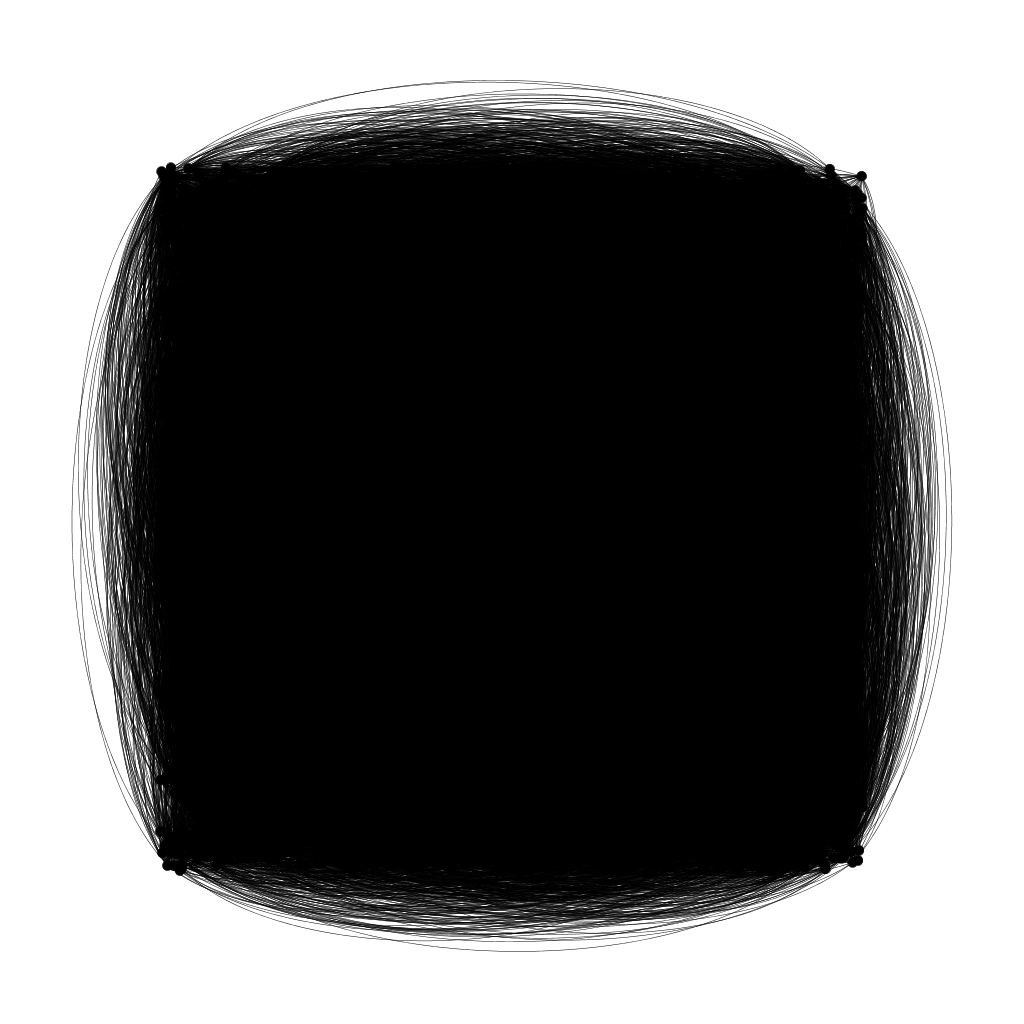

In [94]:
link = "C:\\cuny\\Fall_2018\\620\\week3\\fbd.png"
#link= "https://github.com/raghu74us/DATA-620/blob/master/week3/fbd.png"
#link= 'https://github.com/raghu74us/DATA-620/blob/master/week3/fbd.png'

from IPython.display import Image, display

display(Image(filename=link))

# Analysis

The degree of node v, CD(v) is simply the number of edges connected to node v, which we can compute by 
either summing over row v or column v of A:

Closeness CC(v) deﬁnes that a node is central if it is ‘close’ to other nodes. This can be computed by 
taking the inverse of the sum of all path lengths going from node v to all other nodes:
This is only an interesting measure for fully connected graphs or components.

Betweenness of node v is deﬁned as the sum of proportions of the number of shortest paths between
all pairs of nodes that go through node v:

Eigenvector centrality states that a node if central if its neighbors are central, and is recursive.

Diameter: It is the shortest distance between the two most distant nodes in the network. In other words,
once the shortest path length from every node to all other nodes is calculated, the diameter is the 
longest of all the calculated path lengths. The diameter is representative of the linear size of a network.

In [54]:
# Load algorithms from networkx
from networkx.algorithms import *


In [55]:
cam_net_ud = cam_net.to_undirected()
# Connected components are sorted in descending order of their size 
cam_net_components = list(nx.connected_component_subgraphs(cam_net_ud) )
cam_net_mc = cam_net_components[0]

# Betweenness centrality 
bet_cen = nx.betweenness_centrality(cam_net_mc)
# Closeness centrality 
clo_cen = nx.closeness_centrality(cam_net_mc)
# Eigenvector centrality 
eig_cen = nx.eigenvector_centrality(cam_net_mc)

In [40]:
# Define function that would create a sorted list, from highest to lowest.
def get_top_keys(dictionary, top): 
    items = list(dictionary.items()) 
    items.sort(reverse=True, key=lambda x: x[1]) 
    return map(lambda x: x[0], items[:top])

top_bet_cen = list(get_top_keys(bet_cen,10) )
top_clo_cen = list(get_top_keys(clo_cen,10) )
top_eig_cent = list( get_top_keys(eig_cen,10) )

In [41]:
# Betweenness centrality 
print(top_bet_cen)

[107, 1684, 3437, 1912, 1085, 0, 698, 567, 58, 428]


In [169]:
d = nx.diameter(fbG,e=None)
d

8

In [42]:
# Closeness centrality 
print(top_clo_cen)

[107, 58, 428, 563, 1684, 171, 348, 483, 414, 376]


In [43]:
# Eigenvector centrality
print(top_eig_cent)

[1912, 2266, 2206, 2233, 2464, 2142, 2218, 2078, 2123, 1993]
